In [ ]:
 from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Capstone_Project

/content/drive/MyDrive/Capstone_Project


In [ ]:
#Import Required Packages for EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/performance_grade_new_DATA_SET.csv')

In [ ]:
#1. Checking description(first 5 and last 5 rows)
df.head()

age  sex  graduated_h_school_type  scholarship_type  additional_work  \
0    2    2                        3                 3                1   
1    2    2                        3                 3                1   
2    2    2                        2                 3                2   
3    1    1                        1                 3                1   
4    2    2                        1                 3                2   

   activity  partner  total_salary  transport  accomodation  ...  \
0         2        2             1          1             1  ...   
1         2        2             1          1             1  ...   
2         2        2             2          4             2  ...   
3         2        1             2          1             2  ...   
4         2        1             3          1             4  ...   

   preparation_midterm_company  preparation_midterm_time  taking_notes  \
0                            1                         1             3   
1                            1                         1             3   
2                            1                         1             2   
3                            1                         2             3   
4                            2                         1             2   

   listenning  discussion_improves_interest  flip_classrom  grade_previous  \
0           2                             1              2               1   
1           2                             3              2               2   
2           2                             1              1               2   
3           2                             2              1               3   
4           2                             2              1               2   

   grade_expected  course_id  grade  
0               1          1      1  
1               3          1      1  
2               2          1      1  
3               2          1      1  
4               2          1      1  

[5 rows x 32 columns]

In [ ]:
df.tail()

age  sex  graduated_h_school_type  scholarship_type  additional_work  \
140    2    1                        2                 3                1   
141    1    1                        2                 4                2   
142    1    1                        1                 4                2   
143    2    1                        2                 4                1   
144    1    1                        1                 5                2   

     activity  partner  total_salary  transport  accomodation  ...  \
140         1        2             1          1             2  ...   
141         2        2             1          4             2  ...   
142         2        2             1          1             1  ...   
143         1        1             5          2             3  ...   
144         2        2             3          1             1  ...   

     preparation_midterm_company  preparation_midterm_time  taking_notes  \
140                            1                         1             2   
141                            1                         1             3   
142                            1                         1             3   
143                            2                         1             2   
144                            2                         1             3   

     listenning  discussion_improves_interest  flip_classrom  grade_previous  \
140           1                             2              1               3   
141           2                             2              1               5   
142           3                             2              1               4   
143           1                             2              1               5   
144           2                             3              1               5   

     grade_expected  course_id  grade  
140               3          9      2  
141               3          9      2  
142               3          9      1  
143               3          9      1  
144               4          9      1  

[5 rows x 32 columns]

In [ ]:
df.shape

(145, 32)

In [ ]:
df.columns


Index(['age', 'sex', 'graduated_h_school_type', 'scholarship_type',
       'additional_work', 'activity', 'partner', 'total_salary', 'transport',
       'accomodation', 'mother_ed', 'farther_ed', 'siblings',
       'parental_status', 'mother_occup', 'father_occup', 'weekly_study_hours',
       'reading_non_scientific', 'reading_scientific',
       'attendance_seminars_dep', 'impact_of_projects', 'attendances_classes',
       'preparation_midterm_company', 'preparation_midterm_time',
       'taking_notes', 'listenning', 'discussion_improves_interest',
       'flip_classrom', 'grade_previous', 'grade_expected', 'course_id',
       'grade'],
      dtype='object')

In [ ]:
df.nunique()

age                             3
sex                             2
graduated_h_school_type         3
scholarship_type                5
additional_work                 2
activity                        2
partner                         2
total_salary                    5
transport                       4
accomodation                    4
mother_ed                       6
farther_ed                      6
siblings                        5
parental_status                 3
mother_occup                    5
father_occup                    5
weekly_study_hours              5
reading_non_scientific          3
reading_scientific              3
attendance_seminars_dep         2
impact_of_projects              3
attendances_classes             2
preparation_midterm_company     3
preparation_midterm_time        3
taking_notes                    3
listenning                      3
discussion_improves_interest    3
flip_classrom                   3
grade_previous                  5
grade_expected

In [ ]:
#Complete info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           145 non-null    int64
 1   sex                           145 non-null    int64
 2   graduated_h_school_type       145 non-null    int64
 3   scholarship_type              145 non-null    int64
 4   additional_work               145 non-null    int64
 5   activity                      145 non-null    int64
 6   partner                       145 non-null    int64
 7   total_salary                  145 non-null    int64
 8   transport                     145 non-null    int64
 9   accomodation                  145 non-null    int64
 10  mother_ed                     145 non-null    int64
 11  farther_ed                    145 non-null    int64
 12  siblings                      145 non-null    int64
 13  parental_status               145 n

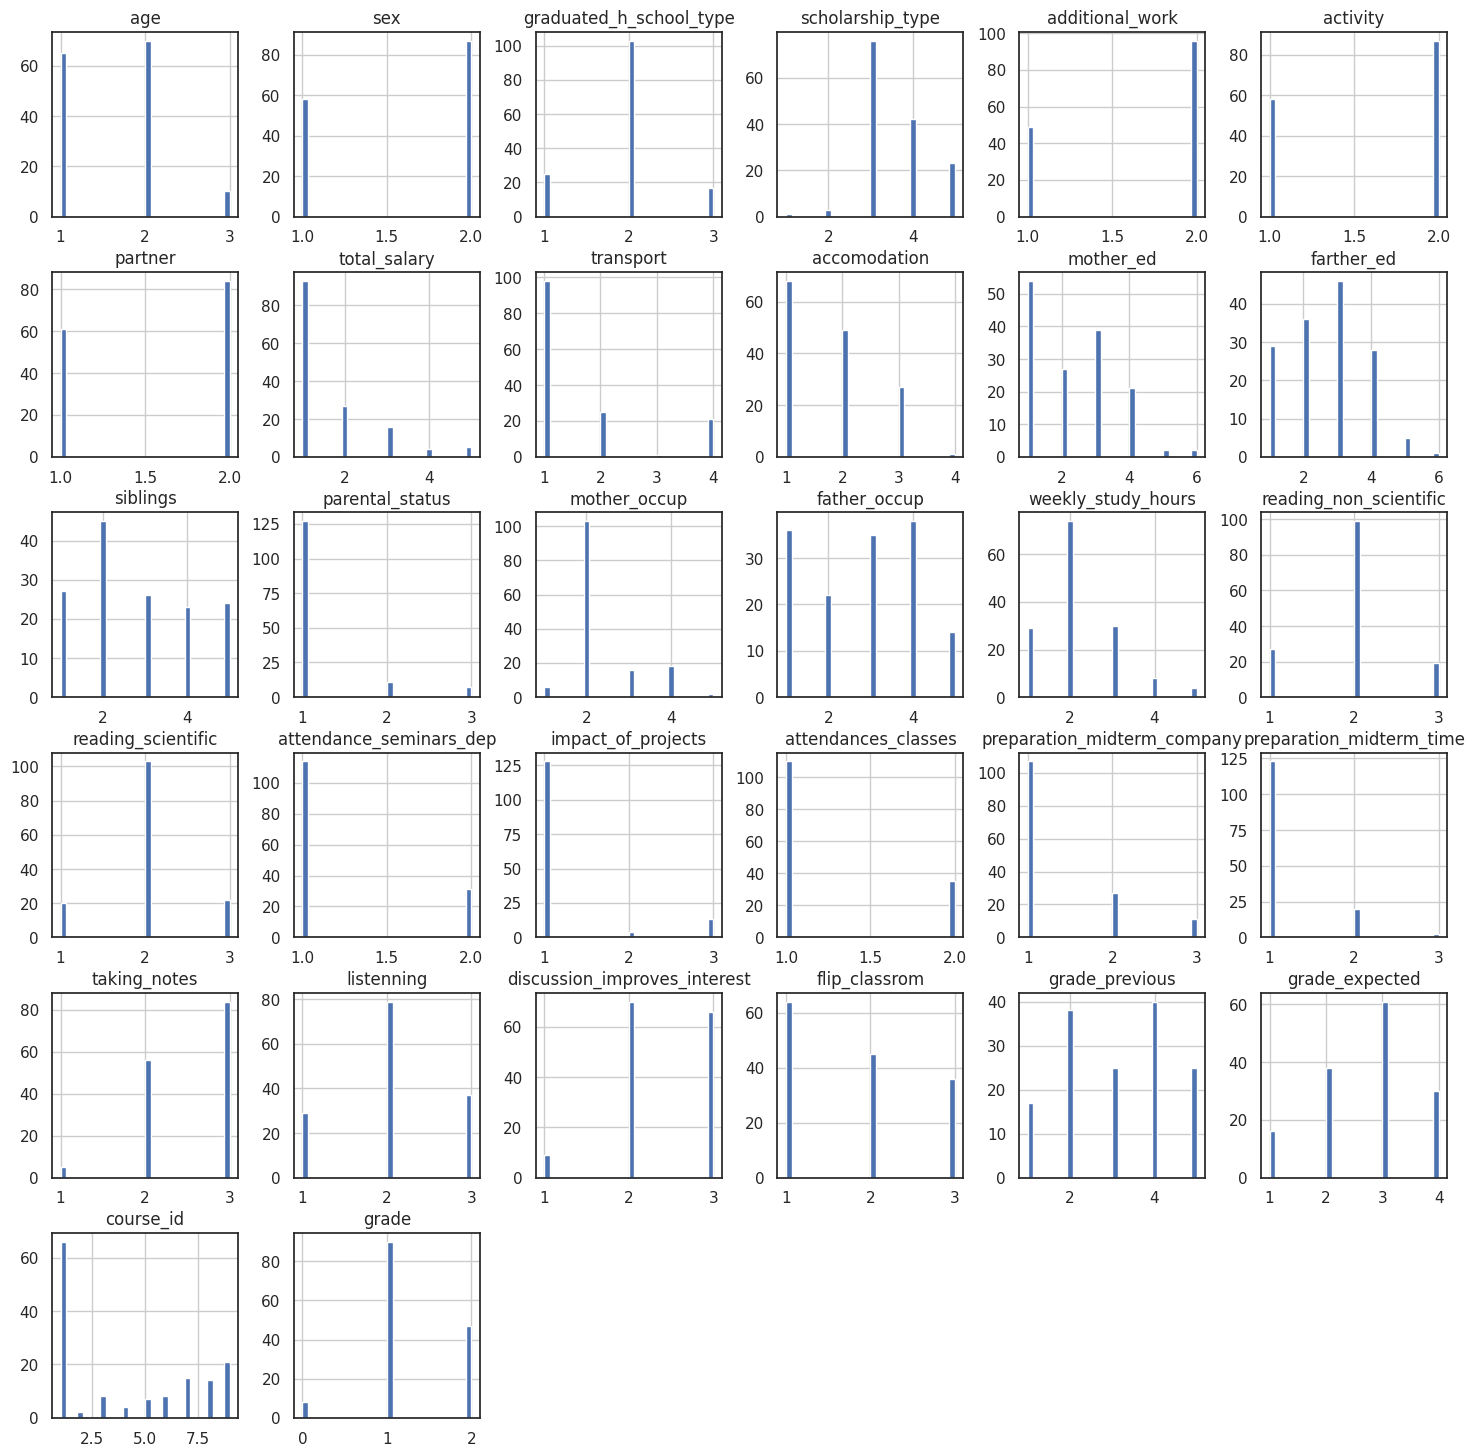

In [ ]:
#3. Visualising data distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

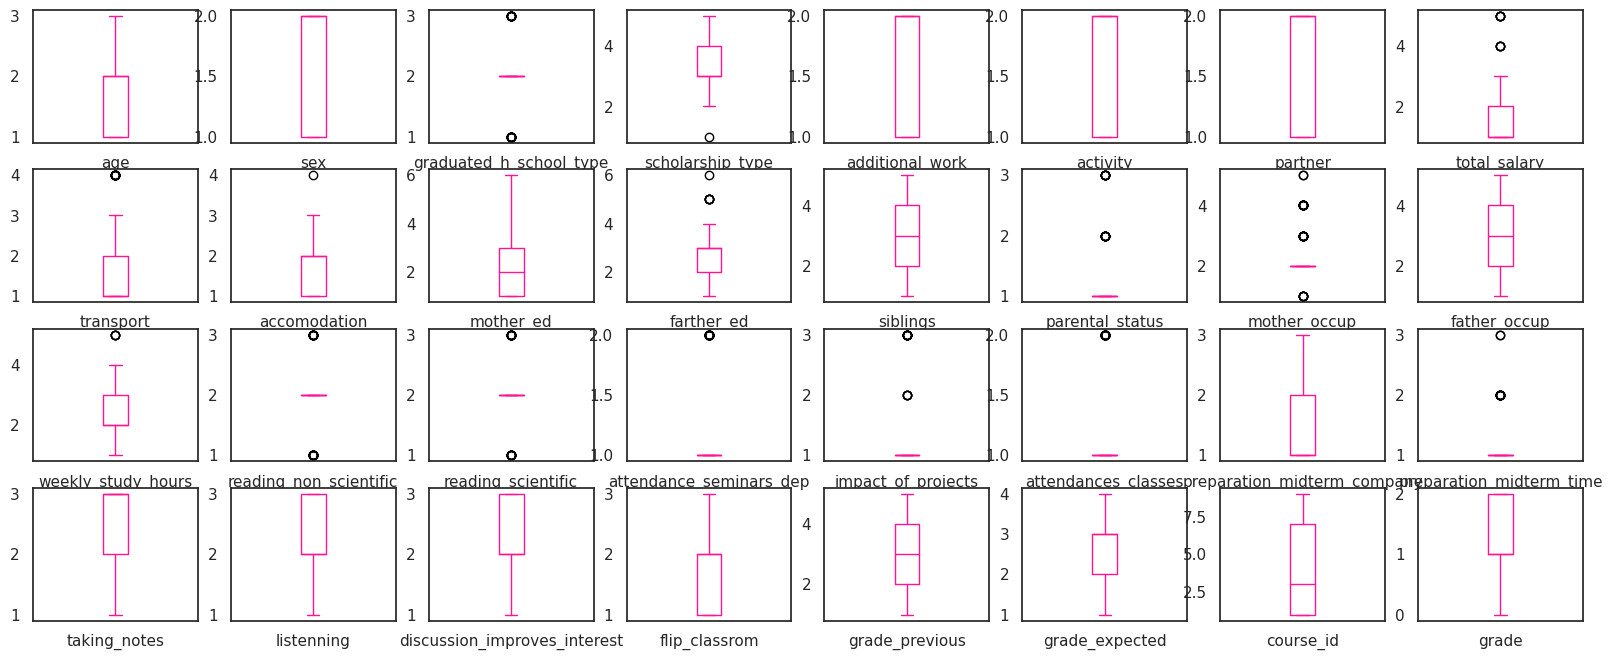

In [ ]:
#detecting outliers
df.plot(kind='box', subplots=True,
        layout=(5,8),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

1    90
2    47
0     8
Name: grade, dtype: int64


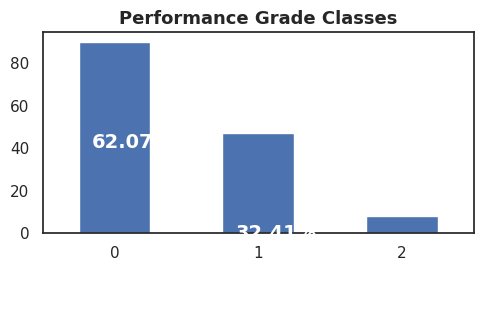

In [ ]:
print(df.grade.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["0", "1", "2"]
ax = df.grade.value_counts().plot(kind='bar')
ax.set_title("Performance Grade Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

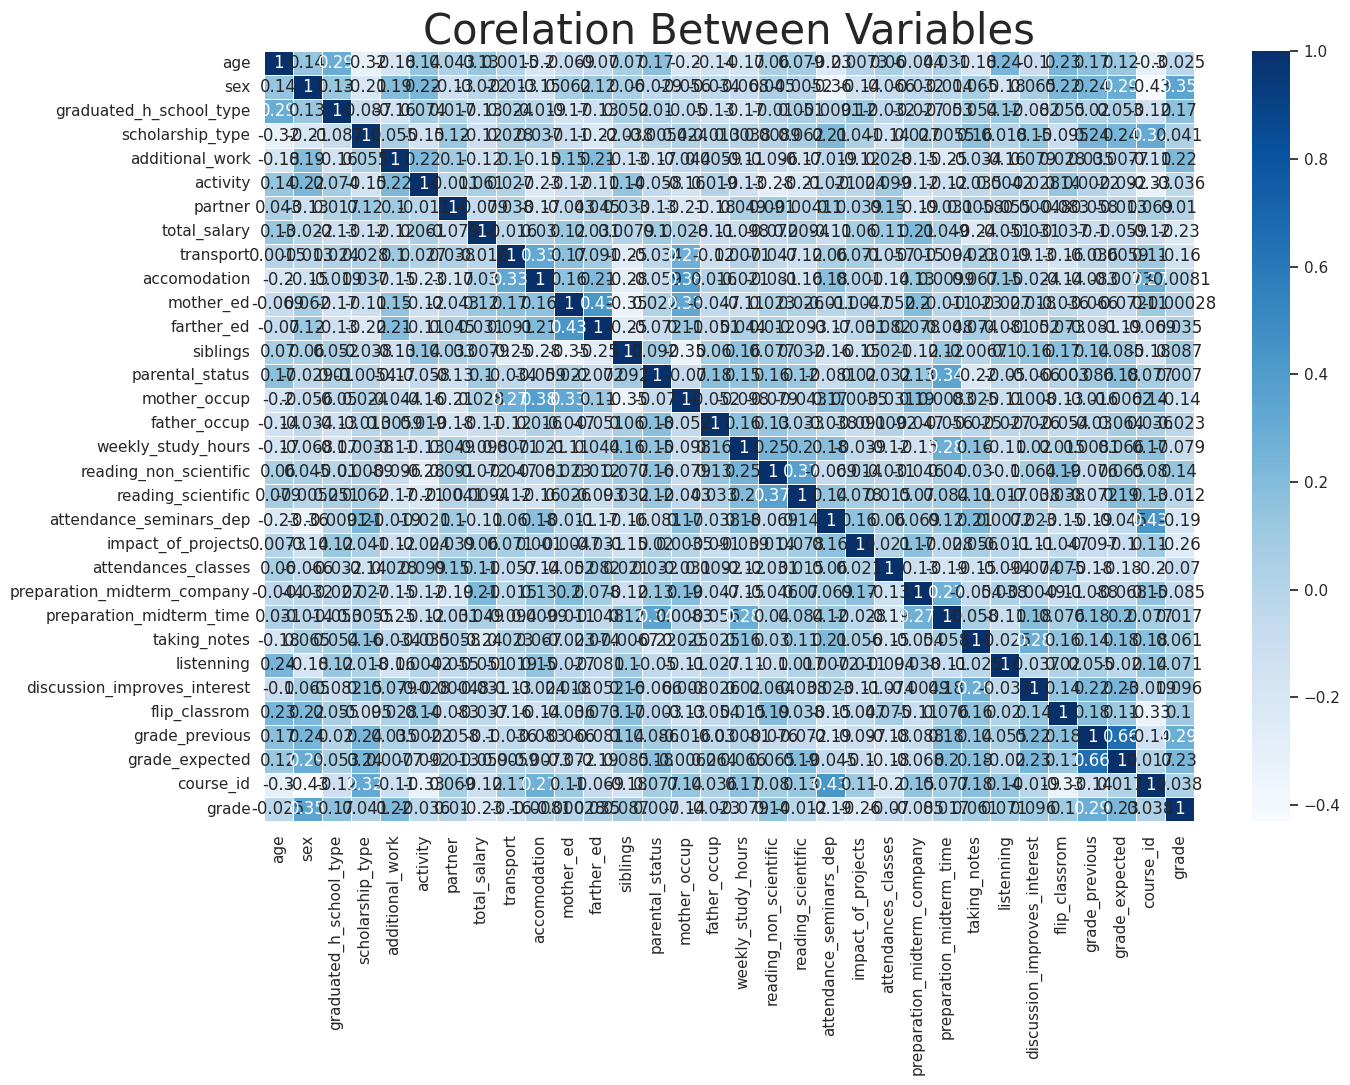

In [ ]:
#check correlation between variables
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.6 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Performance Grade EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df

age  sex  graduated_h_school_type  scholarship_type  additional_work  \
0      2    2                        3                 3                1   
1      2    2                        3                 3                1   
2      2    2                        2                 3                2   
3      1    1                        1                 3                1   
4      2    2                        1                 3                2   
..   ...  ...                      ...               ...              ...   
140    2    1                        2                 3                1   
141    1    1                        2                 4                2   
142    1    1                        1                 4                2   
143    2    1                        2                 4                1   
144    1    1                        1                 5                2   

     activity  partner  total_salary  transport  accomodation  ...  \
0           2        2             1          1             1  ...   
1           2        2             1          1             1  ...   
2           2        2             2          4             2  ...   
3           2        1             2          1             2  ...   
4           2        1             3          1             4  ...   
..        ...      ...           ...        ...           ...  ...   
140         1        2             1          1             2  ...   
141         2        2             1          4             2  ...   
142         2        2             1          1             1  ...   
143         1        1             5          2             3  ...   
144         2        2             3          1             1  ...   

     preparation_midterm_company  preparation_midterm_time  taking_notes  \
0                              1                         1             3   
1                              1                         1             3   
2                              1                         1             2   
3                              1                         2             3   
4                              2                         1             2   
..                           ...                       ...           ...   
140                            1                         1             2   
141                            1                         1             3   
142                            1                         1             3   
143                            2                         1             2   
144                            2                         1             3   

     listenning  discussion_improves_interest  flip_classrom  grade_previous  \
0             2                             1              2               1   
1             2                             3              2               2   
2             2                             1              1               2   
3             2                             2              1               3   
4             2                             2              1               2   
..          ...                           ...            ...             ...   
140           1                             2              1               3   
141           2                             2              1               5   
142           3                             2              1               4   
143           1                             2              1               5   
144           2                             3              1               5   

     grade_expected  course_id  grade  
0                 1          1      1  
1                 3          1      1  
2                 2          1      1  
3                 2          1      1  
4                 2          1      1  
..              ...        ...    ...  
140               3          9      2  
141               3          9      2  
142  

In [ ]:
class_label = df['grade']
df = df.drop(['grade'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['grade']=class_label
df

age  sex  graduated_h_school_type  scholarship_type  additional_work  \
0    0.5  1.0                      1.0              0.50              0.0   
1    0.5  1.0                      1.0              0.50              0.0   
2    0.5  1.0                      0.5              0.50              1.0   
3    0.0  0.0                      0.0              0.50              0.0   
4    0.5  1.0                      0.0              0.50              1.0   
..   ...  ...                      ...               ...              ...   
140  0.5  0.0                      0.5              0.50              0.0   
141  0.0  0.0                      0.5              0.75              1.0   
142  0.0  0.0                      0.0              0.75              1.0   
143  0.5  0.0                      0.5              0.75              0.0   
144  0.0  0.0                      0.0              1.00              1.0   

     activity  partner  total_salary  transport  accomodation  ...  \
0         1.0      1.0          0.00   0.000000      0.000000  ...   
1         1.0      1.0          0.00   0.000000      0.000000  ...   
2         1.0      1.0          0.25   1.000000      0.333333  ...   
3         1.0      0.0          0.25   0.000000      0.333333  ...   
4         1.0      0.0          0.50   0.000000      1.000000  ...   
..        ...      ...           ...        ...           ...  ...   
140       0.0      1.0          0.00   0.000000      0.333333  ...   
141       1.0      1.0          0.00   1.000000      0.333333  ...   
142       1.0      1.0          0.00   0.000000      0.000000  ...   
143       0.0      0.0          1.00   0.333333      0.666667  ...   
144       1.0      1.0          0.50   0.000000      0.000000  ...   

     preparation_midterm_company  preparation_midterm_time  taking_notes  \
0                            0.0                       0.0           1.0   
1                            0.0                       0.0           1.0   
2                            0.0                       0.0           0.5   
3                            0.0                       0.5           1.0   
4                            0.5                       0.0           0.5   
..                           ...                       ...           ...   
140                          0.0                       0.0           0.5   
141                          0.0                       0.0           1.0   
142                          0.0                       0.0           1.0   
143                          0.5                       0.0           0.5   
144                          0.5                       0.0           1.0   

     listenning  discussion_improves_interest  flip_classrom  grade_previous  \
0           0.5                           0.0            0.5            0.00   
1           0.5                           1.0            0.5            0.25   
2           0.5                           0.0            0.0            0.25   
3           0.5                           0.5            0.0            0.50   
4           0.5                           0.5            0.0            0.25   
..          ...                           ...            ...             ...   
140         0.0                           0.5            0.0            0.50   
141         0.5                           0.5            0.0            1.00   
142         1.0                           0.5            0.0            0.75   
143         0.0                           0.5            0.0            1.00   
144         0.5                           1.0            0.0            1.00   

     grade_expected  course_id  grade  
0          0.000000        0.0      1  
1          0.666667        0.0      1  
2          0.333333        0.0      1  
3          0.333333        0.0      1  
4          0.333333        0.0      1  
..              ...        ...    ...  
140        0.666667        1.0      2  
141        0.666667        1.0      2  
142  

In [ ]:
#pre-processing
grade_data = df.copy()
le = preprocessing.LabelEncoder()
age = le.fit_transform(list(grade_data["age"])) # age in years
sex = le.fit_transform(list(grade_data["sex"])) # gender (1 = male; 0 = female)
graduated_h_school_type = le.fit_transform(list(grade_data["graduated_h_school_type"])) # chest-pain and chest-pain type
scholarship_type = le.fit_transform(list(grade_data["scholarship_type"])) # resting blood pressure (mm/Hg)
additional_work = le.fit_transform(list(grade_data["additional_work"])) # serum cholestrol (mg/dl)
activity = le.fit_transform(list(grade_data["activity"])) # fasting blood sugar
partner = le.fit_transform(list(grade_data["partner"])) # resting elctrocardiographic results
total_salary = le.fit_transform(list(grade_data["total_salary"]))
transport = le.fit_transform(list(grade_data["transport"]))
accomodation = le.fit_transform(list(grade_data["accomodation"]))
mother_ed = le.fit_transform(list(grade_data["mother_ed"]))
farther_ed = le.fit_transform(list(grade_data["farther_ed"]))
siblings = le.fit_transform(list(grade_data["siblings"]))
parental_status = le.fit_transform(list(grade_data["parental_status"])) # heart-disease 0-not present 1-present
mother_occup = le.fit_transform(list(grade_data["mother_occup"]))
father_occup = le.fit_transform(list(grade_data["father_occup"]))
weekly_study_hours = le.fit_transform(list(grade_data["weekly_study_hours"]))
reading_non_scientific = le.fit_transform(list(grade_data["reading_non_scientific"]))
reading_scientific = le.fit_transform(list(grade_data["reading_scientific"]))
attendance_seminars_dep = le.fit_transform(list(grade_data["attendance_seminars_dep"]))
impact_of_projects = le.fit_transform(list(grade_data["impact_of_projects"]))
attendances_classes = le.fit_transform(list(grade_data["attendances_classes"]))
preparation_midterm_company = le.fit_transform(list(grade_data["preparation_midterm_company"]))
preparation_midterm_time = le.fit_transform(list(grade_data["preparation_midterm_time"]))
taking_notes = le.fit_transform(list(grade_data["taking_notes"]))
listenning = le.fit_transform(list(grade_data["listenning"]))
discussion_improves_interest = le.fit_transform(list(grade_data["discussion_improves_interest"]))
flip_classrom = le.fit_transform(list(grade_data["flip_classrom"]))
grade_previous = le.fit_transform(list(grade_data["grade_previous"]))
grade_expected = le.fit_transform(list(grade_data["grade_expected"]))
course_id = le.fit_transform(list(grade_data["course_id"]))
grade = le.fit_transform(list(grade_data["grade"]))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
x = list(zip(age, sex, graduated_h_school_type, scholarship_type, additional_work, activity, partner, total_salary, transport, accomodation, mother_ed, farther_ed, siblings, parental_status, mother_occup, father_occup, weekly_study_hours, reading_non_scientific, reading_scientific, attendance_seminars_dep, impact_of_projects, attendances_classes, preparation_midterm_company, preparation_midterm_time, taking_notes, listenning, discussion_improves_interest, flip_classrom, grade_previous, grade_expected, course_id))
y = list(grade)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows


In [ ]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.405072 (0.064015)

SVM: 0.724638 (0.099568)

GBM: 0.689855 (0.107129)

RF: 0.698188 (0.129077)



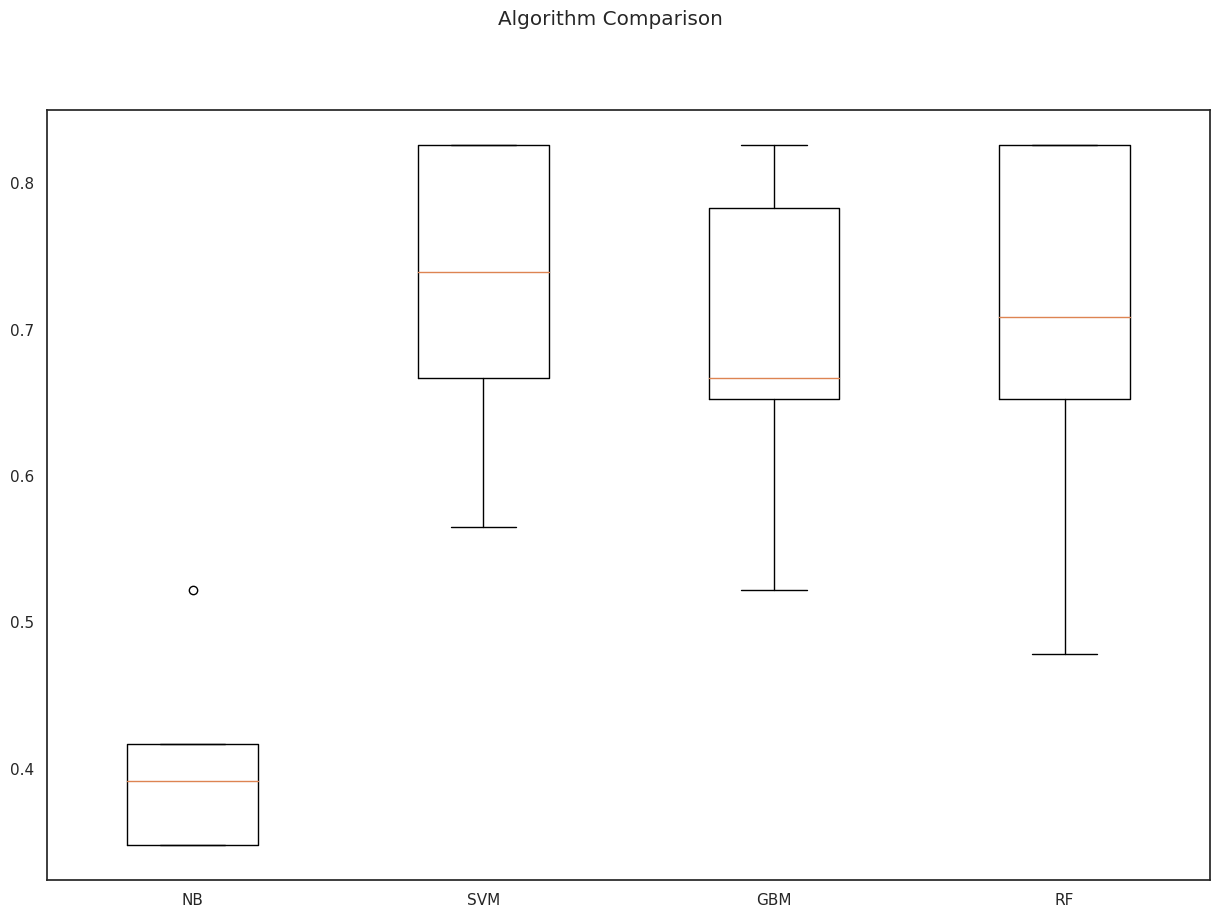

In [ ]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
svm = SVC()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

best_model = svm

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.7586206896551724


In [ ]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.76      0.89      0.82        18
           2       0.75      0.67      0.71         9

    accuracy                           0.76        29
   macro avg       0.50      0.52      0.51        29
weighted avg       0.71      0.76      0.73        29



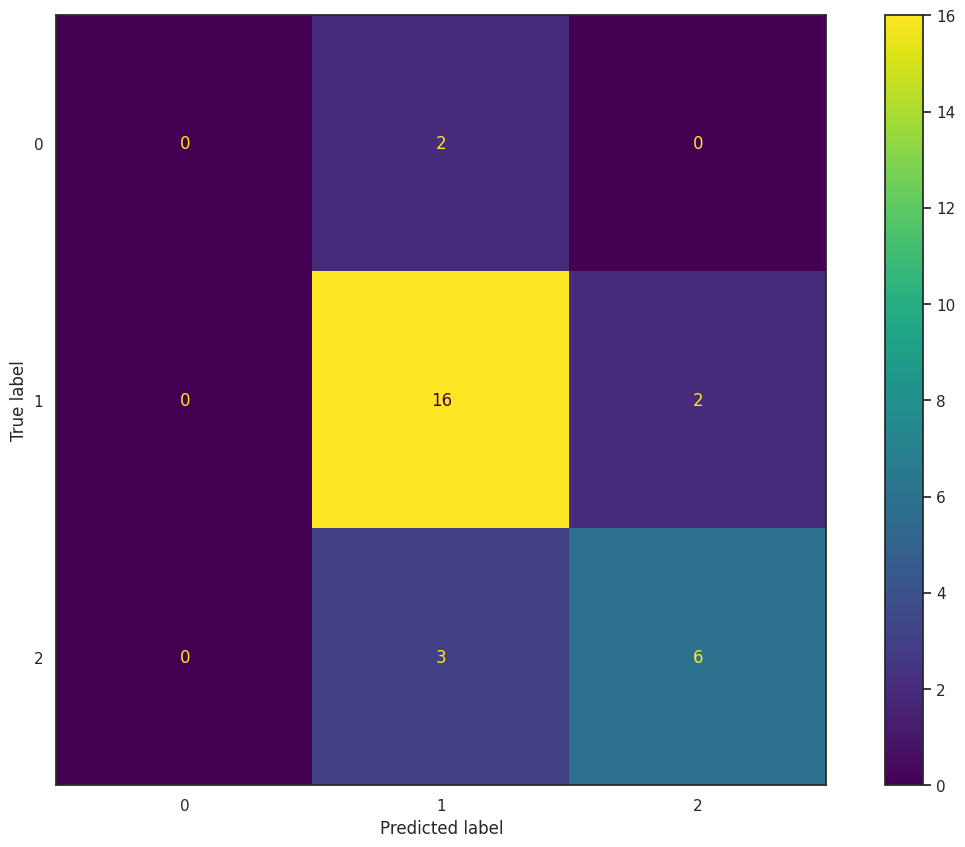

In [ ]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)


Predicted:  1 Actual:  0 Data:  (0, 0, 0, 3, 0, 0, 1, 3, 1, 2, 4, 4, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 3, 2, 0)
Predicted:  1 Actual:  1 Data:  (0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 3, 2, 3, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 8)
Predicted:  1 Actual:  1 Data:  (1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 4, 3, 0)
Predicted:  1 Actual:  1 Data:  (1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0)
Predicted:  2 Actual:  2 Data:  (0, 1, 1, 3, 1, 0, 1, 0, 3, 1, 1, 3, 1, 0, 1, 4, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 3, 6)
Predicted:  2 Actual:  2 Data:  (0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 3, 1, 6)
Predicted:  1 Actual:  1 Data:  (0, 0, 0, 4, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 4, 3, 8)
Predicted:  1 Actual:  1 Data:  (0, 1, 1, 4, 1, 0, 0, 0, 3, 1, 0, 1, 2, 0, 3, 3, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2

In [ ]:
#For multiclass classifiers (More than 2 classes)
#you need to binarize the labels with OVR strategy(One vs. Rest of the classes)
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(29, 3)

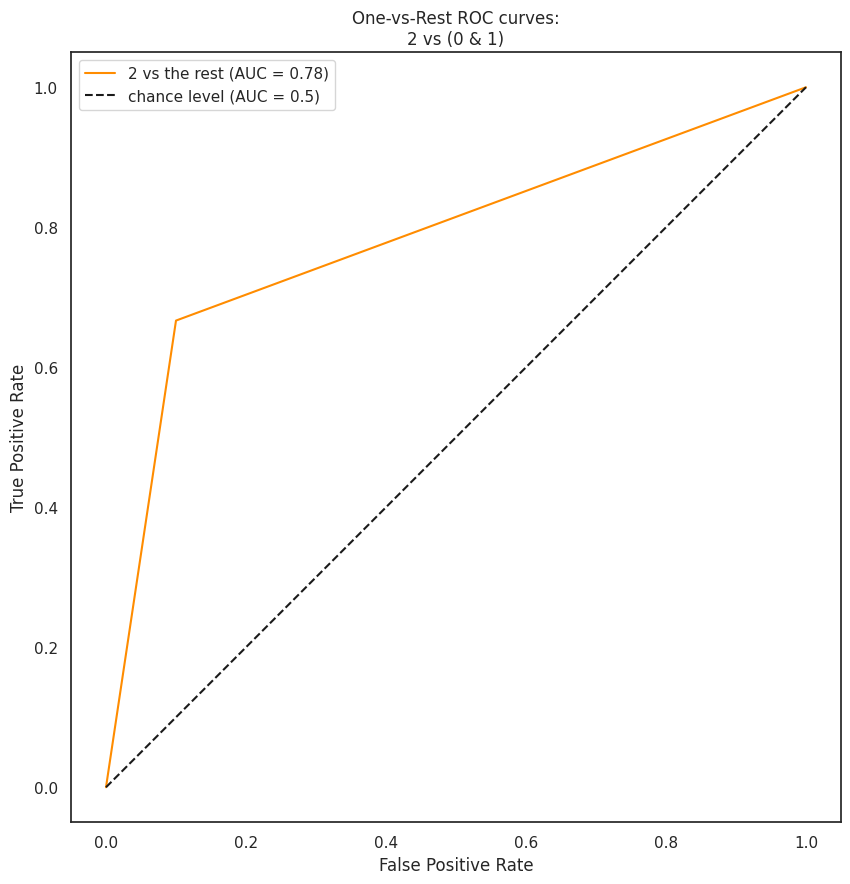

In [ ]:
#ROC curve for class grade 2 ('2')
from sklearn.metrics import RocCurveDisplay
class_id = 2
class_of_interest = "2"

RocCurveDisplay.from_predictions(y_onehot_test[:, class_id],y_pred,
    name=f"{class_of_interest} vs the rest", color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n2 vs (0 & 1)")
plt.legend()
plt.show()

In [ ]:
#Best model export for deployment
import pickle
#save the model to the disk
model_filename = 'best_class_model.h5'
pickle.dump(best_model,open(model_filename,'wb'))

In [ ]:
with open('/content/drive/MyDrive/Capstone_Project/best_class_model.h5','rb') as file:
  load_model = pickle.load(file)

print(str(load_model.score(x_test,y_test)))

0.7586206896551724
